<a href="https://colab.research.google.com/github/davidcassagne/cours-iaphys/blob/main/chapter05_Resultats_DC_fundamentals-of-ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Third Edition](https://www.manning.com/books/deep-learning-with-python-third-edition). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

The book's contents are available online at [deeplearningwithpython.io](https://deeplearningwithpython.io).

In [ ]:
# Ajout DC
# La ligne suivante est inutile dans Google Colab
# !pip install keras keras-hub --upgrade -q

In [ ]:
import os
os.environ["KERAS_BACKEND"] = "jax"

In [ ]:
# @title
import os
from IPython.core.magic import register_cell_magic

@register_cell_magic
def backend(line, cell):
    current, required = os.environ.get("KERAS_BACKEND", ""), line.split()[-1]
    if current == required:
        get_ipython().run_cell(cell)
    else:
        print(
            f"This cell requires the {required} backend. To run it, change KERAS_BACKEND to "
            f"\"{required}\" at the top of the notebook, restart the runtime, and rerun the notebook."
        )

## Fundamentals of machine learning

### Generalization: The goal of machine learning

#### Underfitting and overfitting

##### Noisy training data

##### Ambiguous features

##### Rare features and spurious correlations

In [ ]:
from keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1
)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1
)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
import keras
from keras import layers

def get_model():
    model = keras.Sequential(
        [
            layers.Dense(512, activation="relu"),
            layers.Dense(10, activation="softmax"),
        ]
    )
    model.compile(
        optimizer="adam",
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels,
    train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels,
    train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - accuracy: 0.7843 - loss: 0.6943 - val_accuracy: 0.9029 - val_loss: 0.3106
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9303 - loss: 0.2407 - val_accuracy: 0.9399 - val_loss: 0.2099
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9502 - loss: 0.1696 - val_accuracy: 0.9477 - val_loss: 0.1736
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9670 - loss: 0.1153 - val_accuracy: 0.9577 - val_loss: 0.1451
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9774 - loss: 0.0803 - val_accuracy: 0.9595 - val_loss: 0.1393
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9825 - loss: 0.0619 - val_accuracy: 0.9607 - val_loss: 0.1338
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9887 - loss: 0.0424 - val_accuracy: 0.9622 - val_loss: 0.1260
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9944 - loss: 0.0246 - val_accuracy: 

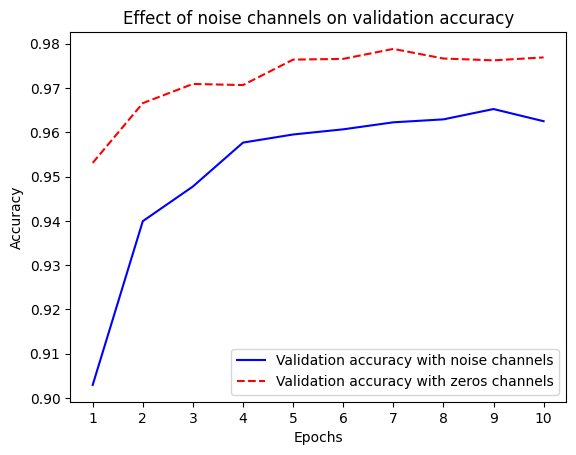

In [ ]:
import matplotlib.pyplot as plt

val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(
    epochs,
    val_acc_noise,
    "b-",
    label="Validation accuracy with noise channels",
)
plt.plot(
    epochs,
    val_acc_zeros,
    "r--",
    label="Validation accuracy with zeros channels",
)
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### The nature of generalization in deep learning

In [ ]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential(
    [
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]
)
model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)
model.fit(
    train_images,
    random_train_labels,
    epochs=100,
    batch_size=128,
    validation_split=0.2,
)

Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.1024 - loss: 2.3360 - val_accuracy: 0.1100 - val_loss: 2.3052
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.1183 - loss: 2.2968 - val_accuracy: 0.1022 - val_loss: 2.3085
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1295 - loss: 2.2881 - val_accuracy: 0.1004 - val_loss: 2.3169
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1413 - loss: 2.2750 - val_accuracy: 0.1069 - val_loss: 2.3226
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1545 - loss: 2.2588 - val_accuracy: 0.1032 - val_loss: 2.3304
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1704 - loss: 2.2392 - val_accuracy: 0.1053 - val_loss: 2.3418
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1844 - loss: 2.2156 - val_accuracy: 0.1028 - val_loss: 2.3531
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1999 - loss: 2.1904 - val_ac

##### The manifold hypothesis

##### Interpolation as a source of generalization

##### Why deep learning works

##### Training data is paramount

### Evaluating machine-learning models

#### Training, validation, and test sets

##### Simple hold-out validation

##### K-fold validation

##### Iterated K-fold validation with shuffling

#### Beating a common-sense baseline

#### Things to keep in mind about model evaluation

### Improving model fit

#### Tuning key gradient descent parameters

In [ ]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential(
    [
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]
)
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=1.0),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)
model.fit(
    train_images, train_labels, epochs=10, batch_size=128, validation_split=0.2
)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.1073 - loss: 14.1694 - val_accuracy: 0.0995 - val_loss: 14.5143
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0989 - loss: 14.5247 - val_accuracy: 0.0995 - val_loss: 14.5143
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0984 - loss: 14.5322 - val_accuracy: 0.0995 - val_loss: 14.5143
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0978 - loss: 14.5418 - val_accuracy: 0.0995 - val_loss: 14.5143
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0980 - loss: 14.5389 - val_accuracy: 0.0995 - val_loss: 14.5143
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0959 - loss: 14.5724 - val_accuracy: 0.0995 - val_loss: 14.5143
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0999 - loss: 14.5080 - val_accuracy: 0.0995 - val_loss: 14.5143
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0987 - loss: 14.5275 - 

In [ ]:
model = keras.Sequential(
    [
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]
)
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=1e-2),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)
model.fit(
    train_images, train_labels, epochs=10, batch_size=128, validation_split=0.2
)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.8159 - loss: 1.1587 - val_accuracy: 0.9563 - val_loss: 0.1522
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9629 - loss: 0.1277 - val_accuracy: 0.9635 - val_loss: 0.1483
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9750 - loss: 0.0917 - val_accuracy: 0.9656 - val_loss: 0.1566
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9805 - loss: 0.0745 - val_accuracy: 0.9680 - val_loss: 0.1569
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9815 - loss: 0.0706 - val_accuracy: 0.9691 - val_loss: 0.1545
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9857 - loss: 0.0568 - val_accuracy: 0.9732 - val_loss: 0.1586
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9877 - loss: 0.0524 - val_accuracy: 0.9750 - val_loss: 0.1561
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9899 - loss: 0.0422 - val_accuracy: 0

#### Using better architecture priors

#### Increasing model capacity

In [ ]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)
history_small_model = model.fit(
    train_images, train_labels, epochs=20, batch_size=128, validation_split=0.2
)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.7229 - loss: 1.0639 - val_accuracy: 0.9045 - val_loss: 0.3622
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9009 - loss: 0.3687 - val_accuracy: 0.9147 - val_loss: 0.3109
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9098 - loss: 0.3253 - val_accuracy: 0.9171 - val_loss: 0.2928
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9154 - loss: 0.3078 - val_accuracy: 0.9222 - val_loss: 0.2835
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9186 - loss: 0.2904 - val_accuracy: 0.9229 - val_loss: 0.2779
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9213 - loss: 0.2818 - val_accuracy: 0.9243 - val_loss: 0.2753
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9219 - loss: 0.2816 - val_accuracy: 0.9257 - val_loss: 0.2718
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9237 - loss: 0.2686 - val_accuracy: 0

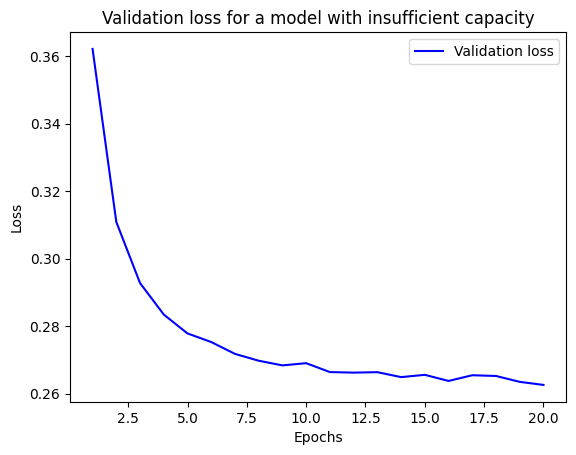

In [ ]:
import matplotlib.pyplot as plt

val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b-", label="Validation loss")
plt.title("Validation loss for a model with insufficient capacity")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
model = keras.Sequential(
    [
        layers.Dense(128, activation="relu"),
        layers.Dense(128, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]
)
model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)
history_large_model = model.fit(
    train_images,
    train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2,
)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.8359 - loss: 0.5791 - val_accuracy: 0.9478 - val_loss: 0.1833
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9530 - loss: 0.1554 - val_accuracy: 0.9655 - val_loss: 0.1224
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9689 - loss: 0.1022 - val_accuracy: 0.9677 - val_loss: 0.1072
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9785 - loss: 0.0730 - val_accuracy: 0.9716 - val_loss: 0.0952
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9821 - loss: 0.0572 - val_accuracy: 0.9717 - val_loss: 0.0963
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9859 - loss: 0.0439 - val_accuracy: 0.9699 - val_loss: 0.1070
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9889 - loss: 0.0370 - val_accuracy: 0.9757 - val_loss: 0.0943
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9914 - loss: 0.0280 - val_accuracy: 

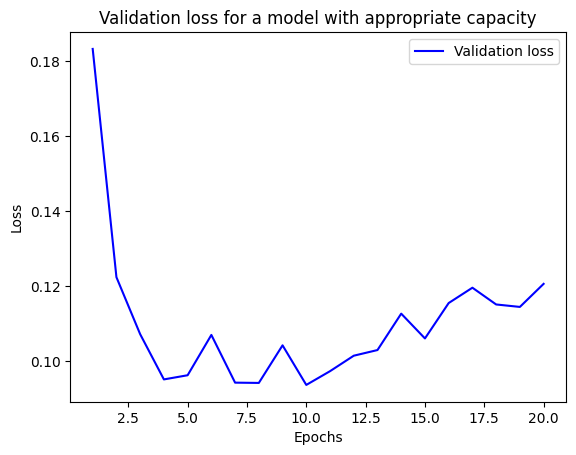

In [ ]:
val_loss = history_large_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b-", label="Validation loss")
plt.title("Validation loss for a model with appropriate capacity")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
model = keras.Sequential(
    [
        layers.Dense(2048, activation="relu"),
        layers.Dense(2048, activation="relu"),
        layers.Dense(2048, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]
)
model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)
history_very_large_model = model.fit(
    train_images,
    train_labels,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.8715 - loss: 0.4496 - val_accuracy: 0.9571 - val_loss: 0.1675
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9686 - loss: 0.1175 - val_accuracy: 0.9707 - val_loss: 0.1139
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9786 - loss: 0.0836 - val_accuracy: 0.9645 - val_loss: 0.1575
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9826 - loss: 0.0642 - val_accuracy: 0.9745 - val_loss: 0.1164
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9870 - loss: 0.0563 - val_accuracy: 0.9758 - val_loss: 0.1520
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9895 - loss: 0.0437 - val_accuracy: 0.9765 - val_loss: 0.1436
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9924 - loss: 0.0365 - val_accuracy: 0.9757 - val_loss: 0.1620
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9921 - loss: 0.0355 -

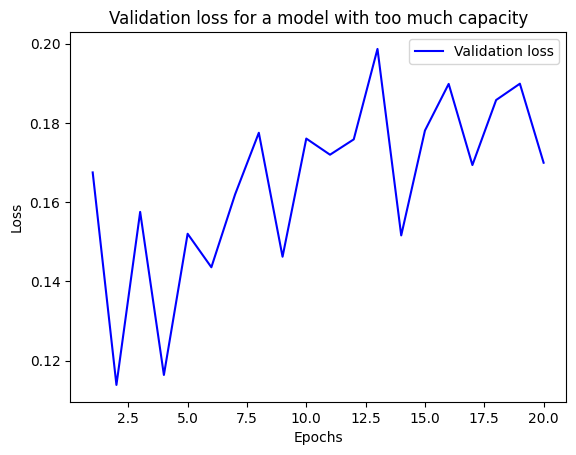

In [ ]:
val_loss = history_very_large_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b-", label="Validation loss")
plt.title("Validation loss for a model with too much capacity")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Improving generalization

#### Dataset curation

#### Feature engineering

#### Using early stopping

#### Regularizing your model

##### Reducing the network's size

In [ ]:
from keras.datasets import imdb

(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0
    return results

train_data = vectorize_sequences(train_data)

model = keras.Sequential(
    [
        layers.Dense(16, activation="relu"),
        layers.Dense(16, activation="relu"),
        layers.Dense(1, activation="sigmoid"),
    ]
)
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"],
)
history_original = model.fit(
    train_data,
    train_labels,
    epochs=20,
    batch_size=512,
    validation_split=0.4,
)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 12s 274ms/step - accuracy: 0.6972 - loss: 0.5922 - val_accuracy: 0.8718 - val_loss: 0.3886
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8938 - loss: 0.3358 - val_accuracy: 0.8759 - val_loss: 0.3221
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9215 - loss: 0.2448 - val_accuracy: 0.8747 - val_loss: 0.3039
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9358 - loss: 0.1974 - val_accuracy: 0.8815 - val_loss: 0.2908
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9506 - loss: 0.1594 - val_accuracy: 0.8896 - val_loss: 0.2791
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9610 - loss: 0.1361 - val_accuracy: 0.8884 - val_loss: 0.2856
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9675 - loss: 0.1157 - val_accuracy: 0.8786 - val_loss: 0.3206
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.

In [ ]:
model = keras.Sequential(
    [
        layers.Dense(4, activation="relu"),
        layers.Dense(4, activation="relu"),
        layers.Dense(1, activation="sigmoid"),
    ]
)
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"],
)
history_smaller_model = model.fit(
    train_data,
    train_labels,
    epochs=20,
    batch_size=512,
    validation_split=0.4,
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 224ms/step - accuracy: 0.5915 - loss: 0.6611 - val_accuracy: 0.6889 - val_loss: 0.5901
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7600 - loss: 0.5629 - val_accuracy: 0.7894 - val_loss: 0.5413
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8216 - loss: 0.5127 - val_accuracy: 0.8567 - val_loss: 0.5147
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8681 - loss: 0.4775 - val_accuracy: 0.8401 - val_loss: 0.4937
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8886 - loss: 0.4494 - val_accuracy: 0.8546 - val_loss: 0.4787
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9028 - loss: 0.4227 - val_accuracy: 0.8696 - val_loss: 0.4666
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9203 - loss: 0.4071 - val_accuracy: 0.8605 - val_loss: 0.4628
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9285 - loss: 0.3889 - val_accuracy: 0.8596 - val_lo

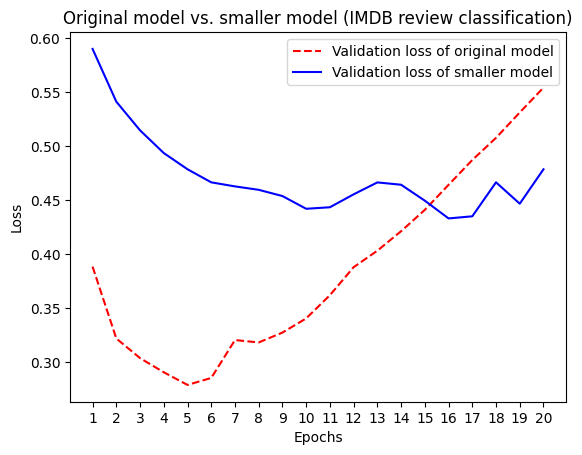

In [ ]:
original_val_loss = history_original.history["val_loss"]
smaller_model_val_loss = history_smaller_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(
    epochs,
    original_val_loss,
    "r--",
    label="Validation loss of original model",
)
plt.plot(
    epochs,
    smaller_model_val_loss,
    "b-",
    label="Validation loss of smaller model",
)
plt.title("Original model vs. smaller model (IMDB review classification)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(epochs)
plt.legend()
plt.show()

In [ ]:
model = keras.Sequential(
    [
        layers.Dense(512, activation="relu"),
        layers.Dense(512, activation="relu"),
        layers.Dense(1, activation="sigmoid"),
    ]
)
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"],
)
history_larger_model = model.fit(
    train_data,
    train_labels,
    epochs=20,
    batch_size=512,
    validation_split=0.4,
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 30s 638ms/step - accuracy: 0.6556 - loss: 0.6500 - val_accuracy: 0.8217 - val_loss: 0.4015
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8362 - loss: 0.3782 - val_accuracy: 0.8879 - val_loss: 0.2826
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9144 - loss: 0.2284 - val_accuracy: 0.8825 - val_loss: 0.2743
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9322 - loss: 0.1815 - val_accuracy: 0.8826 - val_loss: 0.3003
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9490 - loss: 0.1395 - val_accuracy: 0.8864 - val_loss: 0.2800
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9734 - loss: 0.0861 - val_accuracy: 0.8838 - val_loss: 0.3375
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9734 - loss: 0.0785 - val_accuracy: 0.8863 - val_loss: 0.2914
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9921 - loss: 0.0378 - val_accuracy: 0.8846 - val_lo

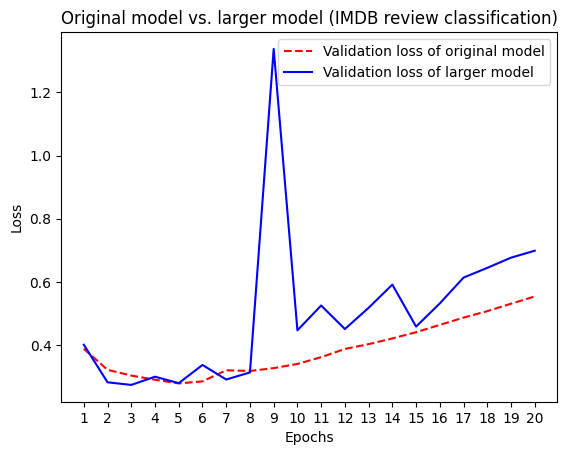

In [ ]:
original_val_loss = history_original.history["val_loss"]
larger_model_val_loss = history_larger_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(
    epochs,
    original_val_loss,
    "r--",
    label="Validation loss of original model",
)
plt.plot(
    epochs,
    larger_model_val_loss,
    "b-",
    label="Validation loss of larger model",
)
plt.title("Original model vs. larger model (IMDB review classification)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(epochs)
plt.legend()
plt.show()

##### Adding weight regularization

In [ ]:
from keras.regularizers import l2

model = keras.Sequential(
    [
        layers.Dense(16, kernel_regularizer=l2(0.002), activation="relu"),
        layers.Dense(16, kernel_regularizer=l2(0.002), activation="relu"),
        layers.Dense(1, activation="sigmoid"),
    ]
)
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"],
)
history_l2_reg = model.fit(
    train_data,
    train_labels,
    epochs=20,
    batch_size=512,
    validation_split=0.4,
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 117ms/step - accuracy: 0.6993 - loss: 0.6957 - val_accuracy: 0.8247 - val_loss: 0.5185
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8835 - loss: 0.4420 - val_accuracy: 0.8812 - val_loss: 0.4058
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9129 - loss: 0.3517 - val_accuracy: 0.8762 - val_loss: 0.3870
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9208 - loss: 0.3070 - val_accuracy: 0.8886 - val_loss: 0.3567
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9335 - loss: 0.2765 - val_accuracy: 0.8711 - val_loss: 0.3859
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9389 - loss: 0.2657 - val_accuracy: 0.8833 - val_loss: 0.3641
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9408 - loss: 0.2526 - val_accuracy: 0.8842 - val_loss: 0.3588
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9516 - loss: 0.2333 - val_accuracy: 0.8815 - val_los

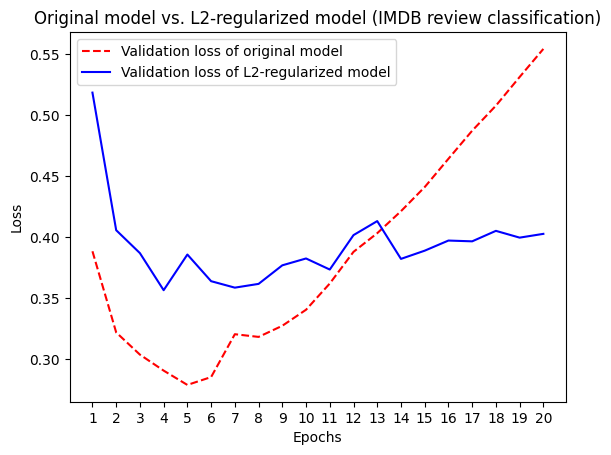

In [ ]:
original_val_loss = history_original.history["val_loss"]
l2_val_loss = history_l2_reg.history["val_loss"]
epochs = range(1, 21)
plt.plot(
    epochs,
    original_val_loss,
    "r--",
    label="Validation loss of original model",
)
plt.plot(
    epochs,
    l2_val_loss,
    "b-",
    label="Validation loss of L2-regularized model",
)
plt.title(
    "Original model vs. L2-regularized model (IMDB review classification)"
)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(epochs)
plt.legend()
plt.show()

In [ ]:
from keras import regularizers

regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

##### Adding dropout

In [ ]:
model = keras.Sequential(
    [
        layers.Dense(16, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(16, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(1, activation="sigmoid"),
    ]
)
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"],
)
history_dropout = model.fit(
    train_data,
    train_labels,
    epochs=20,
    batch_size=512,
    validation_split=0.4,
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 142ms/step - accuracy: 0.5901 - loss: 0.6607 - val_accuracy: 0.8548 - val_loss: 0.4857
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7686 - loss: 0.5127 - val_accuracy: 0.8768 - val_loss: 0.3894
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8328 - loss: 0.4242 - val_accuracy: 0.8830 - val_loss: 0.3244
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8625 - loss: 0.3575 - val_accuracy: 0.8903 - val_loss: 0.2916
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8930 - loss: 0.3075 - val_accuracy: 0.8850 - val_loss: 0.2847
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9106 - loss: 0.2635 - val_accuracy: 0.8903 - val_loss: 0.2789
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9223 - loss: 0.2317 - val_accuracy: 0.8926 - val_loss: 0.2740
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9336 - loss: 0.2044 - val_accuracy: 0.8920 - val_los

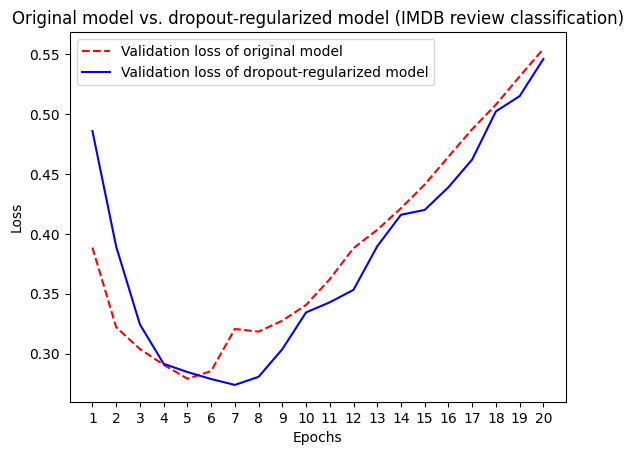

In [ ]:
original_val_loss = history_original.history["val_loss"]
dropout_val_loss = history_dropout.history["val_loss"]
epochs = range(1, 21)
plt.plot(
    epochs,
    original_val_loss,
    "r--",
    label="Validation loss of original model",
)
plt.plot(
    epochs,
    dropout_val_loss,
    "b-",
    label="Validation loss of dropout-regularized model",
)
plt.title(
    "Original model vs. dropout-regularized model (IMDB review classification)"
)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(epochs)
plt.legend()
plt.show()